In [1]:
import logging
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


In [2]:
logging.basicConfig(filename='../../logs/dataAnalysis.log',
                    level=logging.INFO,
					format='%(levelname)s:%(asctime)s:%(message)s',
					datefmt="%Y-%m-%d %H:%M:%S")

In [3]:
def write_report(text:str):
    """
    Write The Findings From Data Analysis
    """
    f = open('../../reports/analyticsReport.txt', 'a')
    f.write(datetime.now().strftime("%d/%m/%Y %H:%M:%S") + ' ' + text + '\n')
    f.close()

write_report('REPORTING')

In [4]:
logging.info('PERFORMING DATA ANALYSIS')

data = pd.read_csv('../../data/data.csv')
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
logging.info('CHECKING IF THE DATA CONTAINS ANY NULL VALUES')
isnull = data.isnull().values.any()

if isnull:
        logging.info('DATA CONTAINS NULL VALUES')
else:
    logging.info('DATA DOES NOT CONTAIN NULL VALUES')

fraud
0    587443
1      7200
Name: fraud, dtype: int64


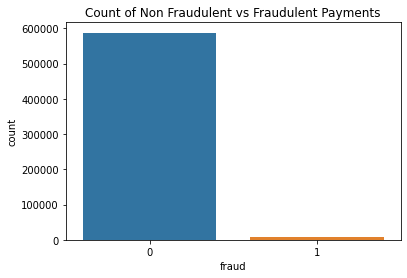

In [6]:
def count_plot(data_frame:pd.DataFrame, column_name:str, title:str=None):
    
    print(data_frame.groupby(column_name)[column_name].count())

    sns.countplot(x=column_name, data=data_frame)
    plt.title(title)
    plt.show()

logging.info('CHECKING IF THE DATA IS BALANCED USING COUNT PLOT')
count_plot(data, 'fraud', 'Count of Non Fraudulent vs Fraudulent Payments')

              category       amount
13         'es_travel'  2250.409190
8         'es_leisure'   288.911303
10  'es_sportsandtoys'   215.715280
6   'es_hotelservices'   205.614249
5            'es_home'   165.670846


<ipython-input-7-f66b4c9db8da>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


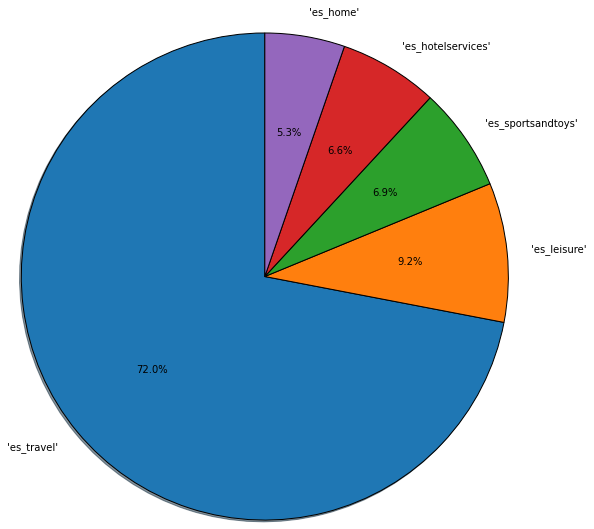

In [7]:
logging.info('CHECKING TOP 5 CATEGORY WITH MOST AMOUNT SPENT')

category = data.groupby('category')['amount'].mean().reset_index().sort_values(['amount'], ascending=False)[0:5]
print(category)
slices = category['amount']
labels = category['category']

plt.pie(slices, labels=labels, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, radius=2.8)

plt.tight_layout()
plt.show()

In [8]:
logging.info('CHECKING FRAUD COUNT PER CATEGORY')

fraud_count_category = data.groupby(['category', 'fraud'])['fraud'].count()
fraud_count_category

category                 fraud
'es_barsandrestaurants'  0          6253
                         1           120
'es_contents'            0           885
'es_fashion'             0          6338
                         1           116
'es_food'                0         26254
'es_health'              0         14437
                         1          1696
'es_home'                0          1684
                         1           302
'es_hotelservices'       0          1196
                         1           548
'es_hyper'               0          5818
                         1           280
'es_leisure'             0            25
                         1           474
'es_otherservices'       0           684
                         1           228
'es_sportsandtoys'       0          2020
                         1          1982
'es_tech'                0          2212
                         1           158
'es_transportation'      0        505119
'es_travel'              0

Text(0, 0.5, 'fraud count')

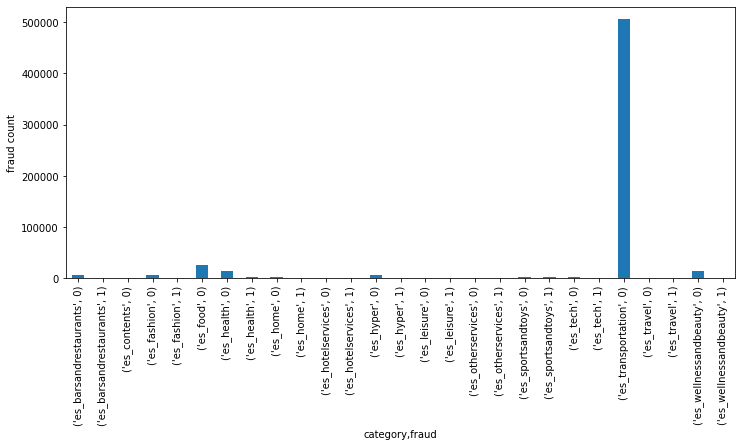

In [9]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1,figsize = (12,5))

fraud_count_category.plot(y='fraud', kind='bar', ax=ax1)
plt.ylabel('fraud count')

In [10]:
data.groupby(['category'])['fraud'].sum()

category
'es_barsandrestaurants'     120
'es_contents'                 0
'es_fashion'                116
'es_food'                     0
'es_health'                1696
'es_home'                   302
'es_hotelservices'          548
'es_hyper'                  280
'es_leisure'                474
'es_otherservices'          228
'es_sportsandtoys'         1982
'es_tech'                   158
'es_transportation'           0
'es_travel'                 578
'es_wellnessandbeauty'      718
Name: fraud, dtype: int64

In [11]:
write_report('CATEGORIES : ["es_contents", "es_food", "es_transportation"] HAVE 0 FRADUS')

<AxesSubplot:xlabel='category'>

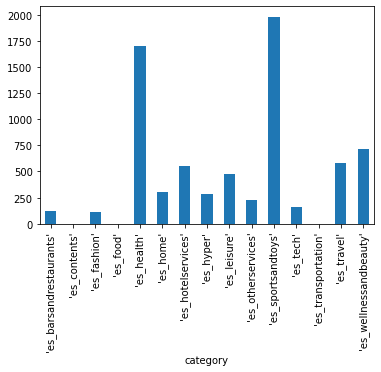

In [12]:
logging.info('CHECKING FRAUD COUNT VS AVG. MONEY SPENT ON EACH CATEGORY')

data.groupby(['category'])['fraud'].sum().plot(kind='bar')

<AxesSubplot:xlabel='category'>

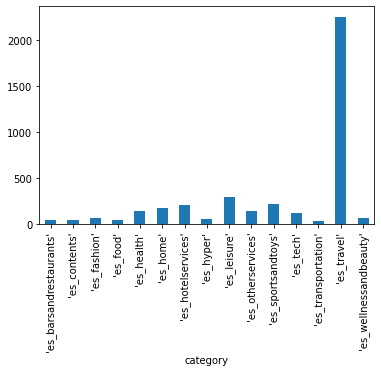

In [13]:
data.groupby(['category'])['amount'].mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

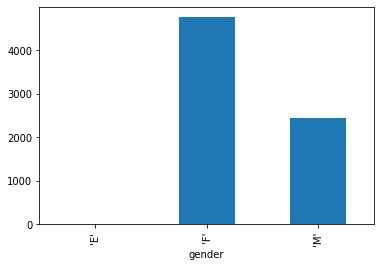

In [14]:
data[data['fraud']==1].groupby('gender')['fraud'].count().plot(kind='bar')

In [15]:
write_report('GENDER : WOMEN COMMIT MOST FRAUDS')

In [16]:
data.groupby(['age', 'fraud'])['fraud'].count()

age  fraud
'0'  0          2404
     1            48
'1'  0         57442
     1           689
'2'  0        184966
     1          2344
'3'  0        145376
     1          1755
'4'  0        107615
     1          1410
'5'  0         61956
     1           686
'6'  0         26513
     1           261
'U'  0          1171
     1             7
Name: fraud, dtype: int64

In [17]:
write_report('AGE GROUP 26-35 COMMIT MOST FRAUDS')

In [18]:
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [19]:
write_report('FEATURES : ["zipcodeOri", "zipMerchant"] HAVE ONLY 1 UNIQUE VALUE EACH')

In [20]:
logging.info('EXIT DATA-ANALYSIS')